# Gradient Boosting 
## Overview
– – – – – **TBD** – – – – – –

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

#### Partition and scale the data

In [2]:
# Load data
california = fetch_california_housing(as_frame=True)
X = california['data']
y = california['target']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True)

# Instantiate scaler
scaler = StandardScaler()

# Fit and transform train and test data
X_train_norm = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_norm, columns = X_train.columns)

X_test_norm = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_norm, columns = X_test.columns)

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(learning_rate = 0.2, max_depth=3, random_state=42)
model_gb.fit(X_train, y_train)

pred_train_gb = model_gb.predict(X_train)
print(f'RMSE Train: {mean_squared_error(y_train, pred_train_gb, squared=False)}')

pred_test_gb = model_gb.predict(X_test)
print(f'RMSE Test: {mean_squared_error(y_test, pred_test_gb, squared=False)}')

RMSE Train: 0.47069450033270727
RMSE Test: 0.5057677886041634


RMSE Train: 0.47069450033270727


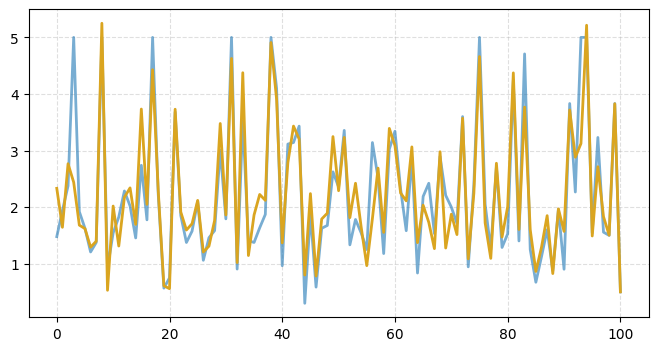

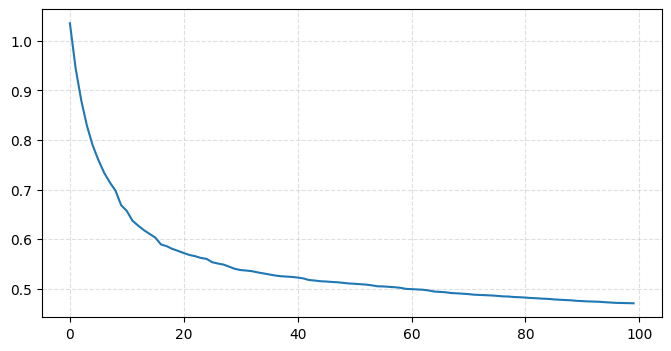

In [7]:
# Initialize the predictions with the mean of the target variable
predictions = np.mean(y_train) * np.ones_like(y_train)

# Set the number of trees (boosting rounds)
n_trees = 100
boosting_mse = []

# Define a learning rate (shrinkage) and create decision trees
learning_rate = 0.2

# Create lists for models and predictions
boosted_trees = []
preds = []

for i in range(n_trees):
    # Calculate the residuals (difference between true target and current predictions)
    residuals = y_train - predictions

    # Fit a decision tree to the residuals (simple decision tree)
    tree = DecisionTreeRegressor(max_depth=3,random_state=42)
    tree.fit(X_train, residuals)

    # Make predictions with the current tree
    tree_predictions = tree.predict(X_train)
    preds.append(tree_predictions)
    
    # Update the predictions with the learning rate and tree predictions
    predictions += learning_rate * tree_predictions
    boosting_mse.append(mean_squared_error(y_train, predictions, squared=False))
    boosted_trees.append(tree)
    
# Final predictions are stored in the 'predictions' variable
final_predictions = predictions

# Evaluate model
mse = mean_squared_error(y_train, final_predictions, squared=False)
print(f"RMSE Train: {mse}")

plt.figure(figsize=(8,4))
plt.plot(X_train[0:101].index,y_train[0:101].values, lw=2, alpha=0.6)
plt.plot(X_train[0:101].index, final_predictions[0:101], lw=2, c='goldenrod');
plt.grid(True, ls='--', alpha=0.4)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(np.arange(0, n_trees), boosting_mse)
plt.grid(True, ls='--', alpha=0.4)
plt.show()

In [8]:
pred_test = np.zeros_like(y_test) + np.mean(y_train)
for tree in boosted_trees:
    preds = tree.predict(X_test)
    pred_test = pred_test + learning_rate * preds

print(f'RMSE Test: {mean_squared_error(y_test, pred_test, squared=False)}')

RMSE Test: 0.5060849766355205


In [6]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor(max_depth = 6, n_estimators = 100, random_state=42)
model_rfr.fit(X_train, y_train)

pred_rfr_train = model_rfr.predict(X_train)
print(f' RMSE Train: {mean_squared_error(y_train, pred_rfr_train, squared=False)}')

pred_rfr_test = model_rfr.predict(X_test)
print(f' RMSE Test: {mean_squared_error(y_test, pred_rfr_test, squared=False)}')

 RMSE Train: 0.6106721665025767
 RMSE Test: 0.6402577384651046
